In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

In [2]:
# 데이터 로드
data = pd.read_csv("F:/kdt jupyter/Project/Data/stage1_preprocessed.csv")

# copy 생성
df = data.copy()
df.head(3)

# time_stamp 데이터 타입 string -> timestamp
df["time_stamp"] = pd.to_datetime(df["time_stamp"])

,time_stamp,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,...,Stage2.Output.Measurement10.U.Actual,Stage2.Output.Measurement10.U.Setpoint,Stage2.Output.Measurement11.U.Actual,Stage2.Output.Measurement11.U.Setpoint,Stage2.Output.Measurement12.U.Actual,Stage2.Output.Measurement12.U.Setpoint,Stage2.Output.Measurement13.U.Actual,Stage2.Output.Measurement13.U.Setpoint,Stage2.Output.Measurement14.U.Actual,Stage2.Output.Measurement14.U.Setpoint
0,2019-03-06 10:52:52,17.24,23.53,11.54,200,963.0,247,1241.780852,72.100109,72.55,...,2.123500e-105,7.93,1.099600e-105,5.65,2.521900e-106,1.85,7.414500e-106,2.89,2.938300e-122,11.71
1,2019-03-06 10:52:53,17.24,23.53,11.54,200,963.0,247,1244.290000,72.100000,72.60,...,0.000000e+00,7.93,0.000000e+00,5.65,0.000000e+00,1.85,0.000000e+00,2.89,0.000000e+00,11.71
2,2019-03-06 10:52:54,17.24,23.53,11.54,200,963.0,247,1249.300000,72.100000,72.60,...,0.000000e+00,7.93,0.000000e+00,5.65,0.000000e+00,1.85,0.000000e+00,2.89,0.000000e+00,11.71


In [3]:
df_copy = df.copy()

#### 1~200 index 제거

In [4]:
df_copy = df_copy[200:]

#### Machine5.ExitTemperature.U.Actual

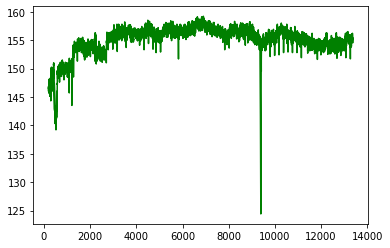

In [5]:
plt.plot(df_copy["Machine5.ExitTemperature.U.Actual"], "g")

"Machine5.ExitTemperature.U.Actual" 에서 10000 인덱스 근처 이상치 제거

In [6]:
drop_index = df_copy.loc[df_copy["Machine5.ExitTemperature.U.Actual"] < 151].index[-50:]

In [7]:
df_copy = df_copy.drop(drop_index)

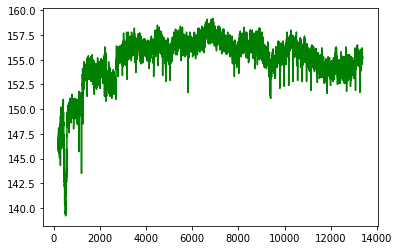

In [8]:
plt.plot(df_copy["Machine5.ExitTemperature.U.Actual"], "g")

#### Machine5.Temperature5.C.Actual

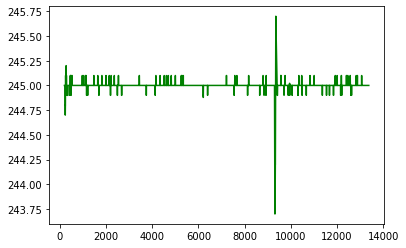

In [9]:
plt.plot(df_copy["Machine5.Temperature5.C.Actual"], "g")

In [10]:
df_copy = df_copy.loc[(df_copy["Machine5.Temperature5.C.Actual"] > 244.75) & 
                      (df_copy["Machine5.Temperature5.C.Actual"] < 245.25)]

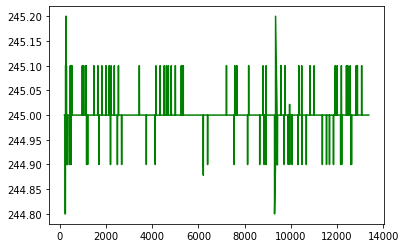

In [11]:
plt.plot(df_copy["Machine5.Temperature5.C.Actual"], "g")

#### Machine4.ExitTemperature.U.Actual

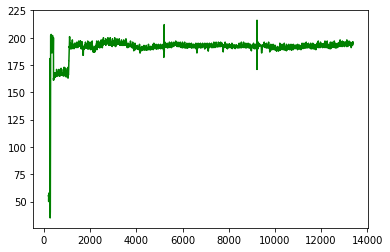

In [12]:
plt.plot(df_copy["Machine4.ExitTemperature.U.Actual"], "g")

In [13]:
drop_index = df_copy[4000:].loc[(df_copy["Machine4.ExitTemperature.U.Actual"] < 185) |
                                (df_copy["Machine4.ExitTemperature.U.Actual"] > 205)].index

In [14]:
df_copy = df_copy.drop(drop_index)

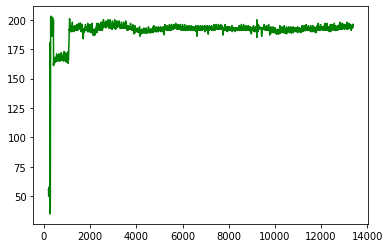

In [15]:
plt.plot(df_copy["Machine4.ExitTemperature.U.Actual"], "g")

#### Machine4.Temperature2.C.Actual

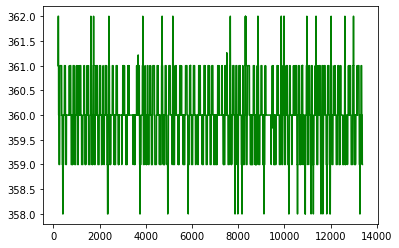

In [16]:
plt.plot(df_copy["Machine4.Temperature2.C.Actual"], "g")

##### df_copy shape

In [17]:
df_copy.shape

(13055, 116)

### Stage2 output check

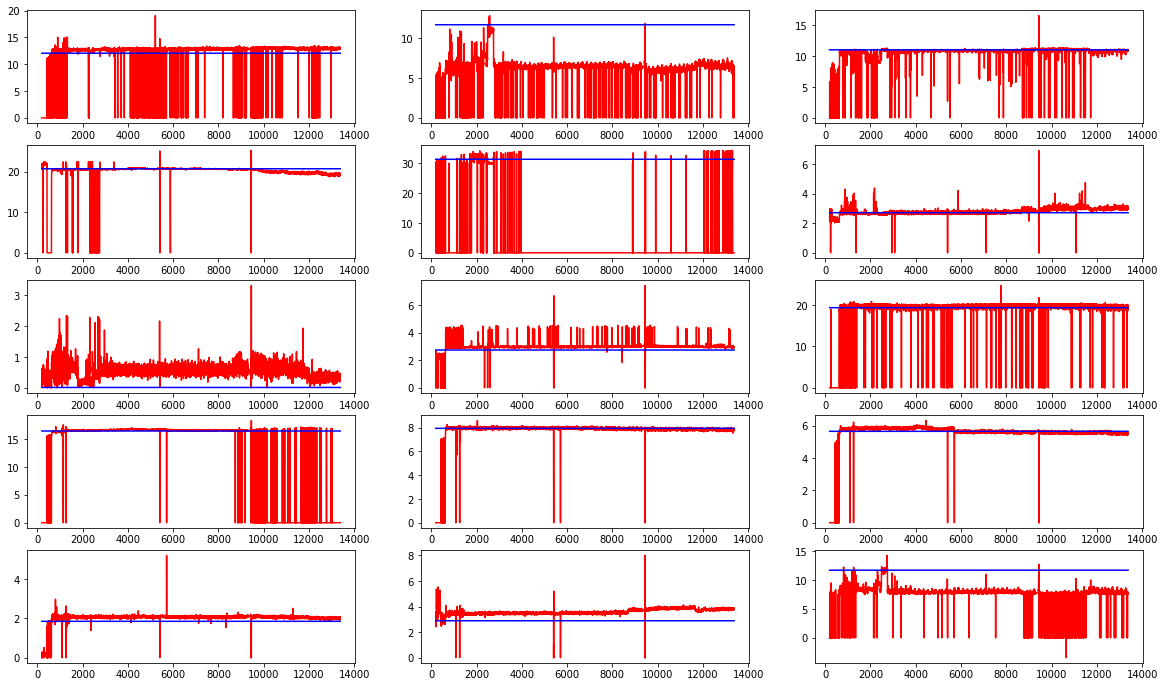

In [18]:
fig, ax = plt.subplots(5, 3, figsize = (20, 12))

for i in range(15):
    Actual = "Stage2.Output.Measurement" + str(i) + ".U.Actual"
    Setpoint = "Stage2.Output.Measurement" + str(i) + ".U.Setpoint"
    
    row = i // 3
    col = i % 3
    
    ax[row, col].plot(df_copy[Actual], "r")
    ax[row, col].plot(df_copy[Setpoint], "b")

plt.show()

### Drop columns

In [19]:
drop_cols = ["time_stamp",
             "Machine1.Zone1Temperature.C.Actual", "Machine2.Zone1Temperature.C.Actual", "Machine3.Zone1Temperature.C.Actual",
             "Machine1.Zone2Temperature.C.Actual", "Machine2.Zone2Temperature.C.Actual", "Machine3.Zone2Temperature.C.Actual",
             "Machine2.ExitZoneTemperature.C.Actual", "Machine3.ExitZoneTemperature.C.Actual",
             "Machine1.MotorAmperage.U.Actual", "Machine2.MotorAmperage.U.Actual", "Machine3.MotorAmperage.U.Actual",
             "Machine2.MotorRPM.C.Actual",
             "FirstStage.CombinerOperation.Temperature3.C.Actual",
             "Machine4.Temperature1.C.Actual", "Machine4.Temperature2.C.Actual", "Machine4.Temperature3.C.Actual", "Machine4.Pressure.C.Actual",
             "Machine5.Temperature1.C.Actual", "Machine5.Temperature2.C.Actual", "Machine5.Temperature5.C.Actual"]

In [20]:
df_X_reduced = df_copy.drop(drop_cols, axis=1).reset_index(drop=True)

In [21]:
df_X_reduced.iloc[:,60:67].corr()

,Machine4.ExitTemperature.U.Actual,Machine5.Temperature3.C.Actual,Machine5.Temperature4.C.Actual,Machine5.Temperature6.C.Actual,Machine5.ExitTemperature.U.Actual,Stage2.Output.Measurement0.U.Actual,Stage2.Output.Measurement0.U.Setpoint
Machine4.ExitTemperature.U.Actual,1.000000e+00,6.962682e-01,4.285567e-01,-2.401178e-01,5.080213e-01,3.790690e-01,-2.049809e-15
Machine5.Temperature3.C.Actual,6.962682e-01,1.000000e+00,6.880655e-01,-2.119907e-01,7.885202e-01,5.653625e-01,1.895503e-13
Machine5.Temperature4.C.Actual,4.285567e-01,6.880655e-01,1.000000e+00,4.965115e-01,4.755302e-01,3.529361e-01,4.608166e-12
Machine5.Temperature6.C.Actual,-2.401178e-01,-2.119907e-01,4.965115e-01,1.000000e+00,-2.347745e-01,-2.164100e-01,-3.412163e-13
Machine5.ExitTemperature.U.Actual,5.080213e-01,7.885202e-01,4.755302e-01,-2.347745e-01,1.000000e+00,4.333971e-01,-8.001799e-14
Stage2.Output.Measurement0.U.Actual,3.790690e-01,5.653625e-01,3.529361e-01,-2.164100e-01,4.333971e-01,1.000000e+00,-3.618908e-15
Stage2.Output.Measurement0.U.Setpoint,-2.049809e-15,1.895503e-13,4.608166e-12,-3.412163e-13,-8.001799e-14,-3.618908e-15,1.000000e+00


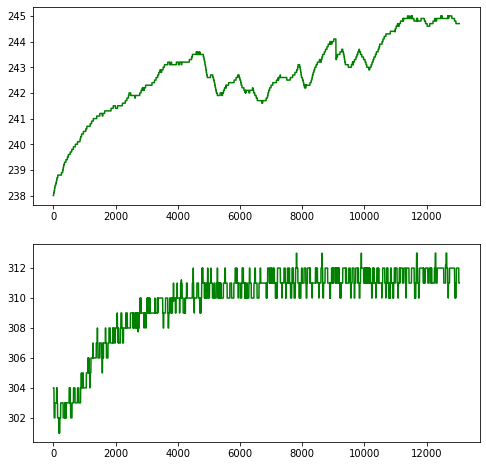

In [22]:
fig, ax = plt.subplots(2, figsize = (8, 8))
ax[0].plot(df_X_reduced["Machine5.Temperature4.C.Actual"], "g")
ax[1].plot(df_X_reduced["Machine4.Temperature5.C.Actual"], "g")

##### 비슷하게 생기긴 했지만, 모양이 다른 부분도 있고, 서로 다른 machine에서 측정되었기 때문에 삭제하지 않음

In [23]:
# 인덱스 reset
df_copy = df_copy.reset_index(drop=True)

## Stage2 output0

In [24]:
df0 = df_copy.copy()

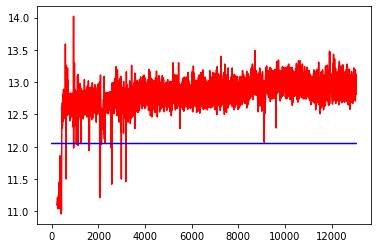

In [25]:
# output 값 10.7 보다 작고 14.5보다 큰 데이터 제거
plt.plot(df0["Stage2.Output.Measurement0.U.Actual"].loc[(df0["Stage2.Output.Measurement0.U.Actual"] > 10.7) &
                                                        (df0["Stage2.Output.Measurement0.U.Actual"] < 14.5)], "r")
plt.plot(df0["Stage2.Output.Measurement0.U.Setpoint"], "b")

In [26]:
# 이상치 제거 데이터 생성
df0_reduced = df0.loc[(df0["Stage2.Output.Measurement0.U.Actual"] > 10.7) & (df0["Stage2.Output.Measurement0.U.Actual"] < 14.5)]

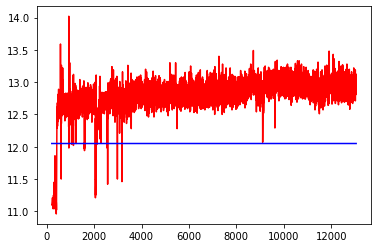

In [27]:
plt.plot(df0_reduced["Stage2.Output.Measurement0.U.Actual"], "r")
plt.plot(df0_reduced["Stage2.Output.Measurement0.U.Setpoint"], "b")

##### reset_index

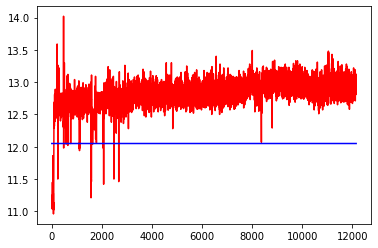

In [28]:
plt.plot(df0_reduced.reset_index(drop = True)["Stage2.Output.Measurement0.U.Actual"], "r")
plt.plot(df0_reduced.reset_index(drop = True)["Stage2.Output.Measurement0.U.Setpoint"], "b")

##### csv 파일 추출

In [29]:
df0_indexed = df0_reduced.reset_index(drop = True)
df0_indexed.to_csv("F:\\kdt jupyter\\Project\\Data\\s2_df0_indexed.csv", index=False)

## Stage1 output1

In [30]:
df1 = df_copy.copy()

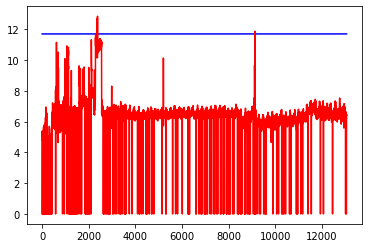

In [31]:
plt.plot(df1["Stage2.Output.Measurement1.U.Setpoint"], "b")
plt.plot(df1["Stage2.Output.Measurement1.U.Actual"], "r")

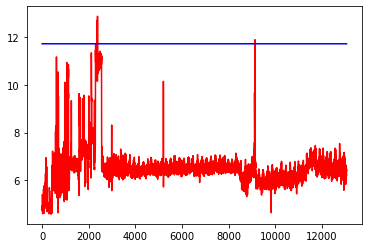

In [32]:
# output 값 4 보다 큰 데이터 제거
plt.plot(df1["Stage2.Output.Measurement1.U.Actual"].loc[df1["Stage2.Output.Measurement1.U.Actual"] > 4], "r")
plt.plot(df1["Stage2.Output.Measurement1.U.Setpoint"], "b")

In [33]:
# 2800 이상 index에서 8보다 큰 데이터 제거
drop_index = df1[2800:].loc[df1["Stage2.Output.Measurement1.U.Actual"] > 8]["Stage2.Output.Measurement1.U.Actual"].index
df1.drop(drop_index, inplace=True)

In [34]:
# 이상치 제거 데이터 생성
df1_reduced = df1.loc[df1["Stage2.Output.Measurement1.U.Actual"] > 4]

##### csv 파일 추출

In [35]:
df1_indexed = df1_reduced.reset_index(drop = True)
df1_indexed.to_csv("F:\\kdt jupyter\\Project\\Data\\s2_df1_indexed.csv", index = False)

In [36]:
df1_indexed.shape

(12631, 116)

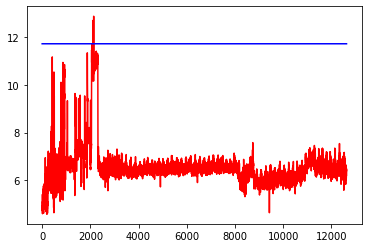

In [37]:
plt.plot(df1_indexed["Stage2.Output.Measurement1.U.Actual"], "r")
plt.plot(df1_indexed["Stage2.Output.Measurement1.U.Setpoint"], "b")

## Stage1 output2

In [38]:
df2 = df_copy.copy()

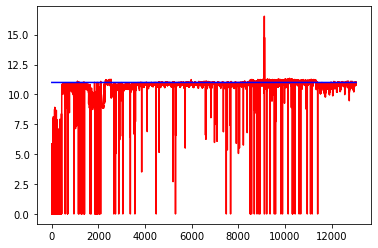

In [39]:
plt.plot(df2["Stage2.Output.Measurement2.U.Actual"], "r")
plt.plot(df2["Stage2.Output.Measurement2.U.Setpoint"], "b")

In [40]:
# 2000 이상 index에서 9보다 작은 데이터 제거
drop_index = df2[2000:].loc[df2["Stage2.Output.Measurement2.U.Actual"] < 9]["Stage2.Output.Measurement2.U.Actual"].index
df2.drop(drop_index, inplace=True)

In [41]:
# 4000 이상 index에서 9.5보다 작은 데이터 제거
drop_index = df2[4000:].loc[df2["Stage2.Output.Measurement2.U.Actual"] < 9.5]["Stage2.Output.Measurement2.U.Actual"].index
df2.drop(drop_index, inplace=True)

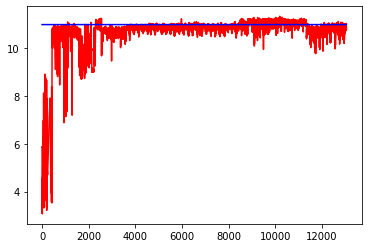

In [42]:
# output 값 0이거나 12 보다 큰 데이터 제거
plt.plot(df2["Stage2.Output.Measurement2.U.Actual"].loc[(df2["Stage2.Output.Measurement2.U.Actual"] > 0.01) &
                                                        (df2["Stage2.Output.Measurement2.U.Actual"] < 12)], "r")
plt.plot(df2["Stage2.Output.Measurement2.U.Setpoint"], "b")

In [43]:
# 이상치 제거 데이터 생성
df2_reduced = df2.loc[(df2["Stage2.Output.Measurement2.U.Actual"] > 0.01) & (df2["Stage2.Output.Measurement2.U.Actual"] < 12)]

##### csv 파일 추출

In [44]:
df2_indexed = df2_reduced.reset_index(drop = True)
df2_indexed.to_csv("F:\\kdt jupyter\\Project\\Data\\s2_df2_indexed.csv", index = False)

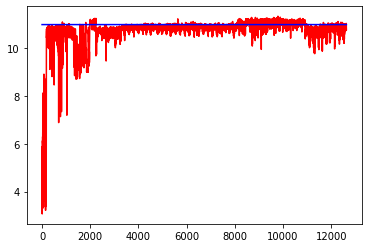

In [45]:
plt.plot(df2_indexed["Stage2.Output.Measurement2.U.Actual"], "r")
plt.plot(df2_indexed["Stage2.Output.Measurement2.U.Setpoint"], "b")

## Stage1 output3

In [46]:
df3 = df_copy.copy()

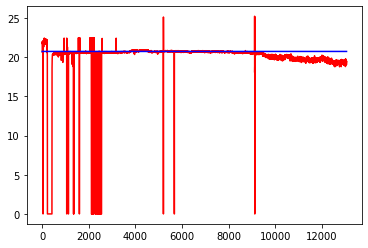

In [47]:
plt.plot(df3["Stage2.Output.Measurement3.U.Actual"], "r")
plt.plot(df3["Stage2.Output.Measurement3.U.Setpoint"], "b")

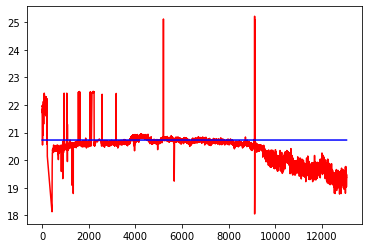

In [48]:
# output 값 5 보다 작은 데이터 제거
plt.plot(df3["Stage2.Output.Measurement3.U.Actual"].loc[df3["Stage2.Output.Measurement3.U.Actual"] > 0.01], "r")
plt.plot(df3["Stage2.Output.Measurement3.U.Setpoint"], "b")

In [49]:
# 600 이상 index에서 21.2보다 큰 데이터 제거
drop_index = df3[600:].loc[df3["Stage2.Output.Measurement3.U.Actual"] > 21.2]["Stage2.Output.Measurement3.U.Actual"].index
df3.drop(drop_index, inplace=True)

In [50]:
# 12000 이하 index에서 19.3 보다 작은 데이터 제거
drop_index = df3[:12000].loc[df3["Stage2.Output.Measurement3.U.Actual"] < 19.3]["Stage2.Output.Measurement3.U.Actual"].index
df3.drop(drop_index, inplace=True)

In [51]:
# 2000 이하 index에서 20보다 작은 데이터 제거
drop_index = df3[:2000].loc[df3["Stage2.Output.Measurement3.U.Actual"] < 20.1]["Stage2.Output.Measurement3.U.Actual"].index
df3.drop(drop_index, inplace=True)

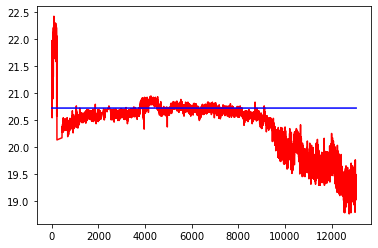

In [52]:
plt.plot(df3["Stage2.Output.Measurement3.U.Actual"].loc[df3["Stage2.Output.Measurement3.U.Actual"] > 0.01], "r")
plt.plot(df3["Stage2.Output.Measurement3.U.Setpoint"], "b")

In [53]:
# 이상치 제거 데이터 생성
df3_reduced = df3.loc[df3["Stage2.Output.Measurement3.U.Actual"] > 0.01]

##### csv 파일 추출

In [54]:
df3_indexed = df3_reduced.reset_index(drop = True)
df3_indexed.to_csv("F:\\kdt jupyter\\Project\\Data\\s2_df3_indexed.csv", index = False)

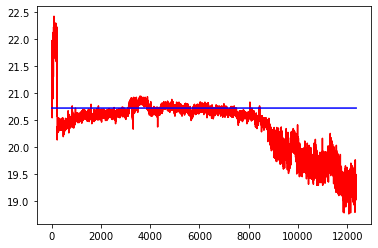

In [55]:
plt.plot(df3_indexed["Stage2.Output.Measurement3.U.Actual"], "r")
plt.plot(df3_indexed["Stage2.Output.Measurement3.U.Setpoint"], "b")

## Stage1 output4

In [56]:
df4 = df_copy.copy()

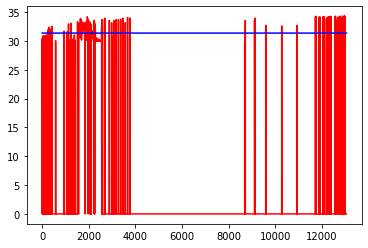

In [57]:
plt.plot(df4["Stage2.Output.Measurement4.U.Actual"], "r")
plt.plot(df4["Stage2.Output.Measurement4.U.Setpoint"], "b")

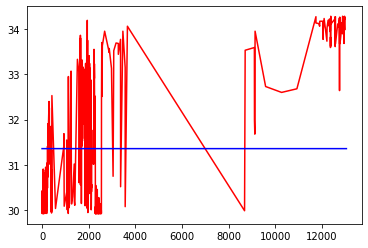

In [58]:
# output 값 29 보다 작은 데이터 제거
plt.plot(df4["Stage2.Output.Measurement4.U.Actual"].loc[df4["Stage2.Output.Measurement4.U.Actual"] > 29], "r")
plt.plot(df4["Stage2.Output.Measurement4.U.Setpoint"], "b")

In [59]:
# 이상치 제거 데이터 생성
df4_reduced = df4.loc[df4["Stage2.Output.Measurement4.U.Actual"] > 29]

##### csv 파일 추출

In [60]:
df4_indexed = df4_reduced.reset_index(drop = True)
df4_indexed.to_csv("F:\\kdt jupyter\\Project\\Data\\s2_df4_indexed.csv", index = False)

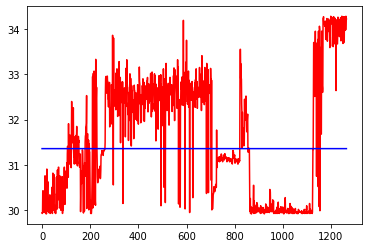

In [61]:
plt.plot(df4_indexed["Stage2.Output.Measurement4.U.Actual"], "r")
plt.plot(df4_indexed["Stage2.Output.Measurement4.U.Setpoint"], "b")

## Stage1 output5

In [62]:
df5 = df_copy.copy()

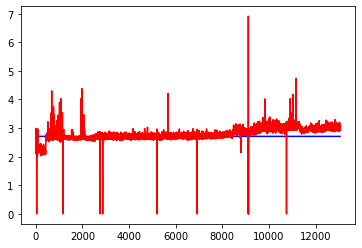

In [63]:
plt.plot(df5["Stage2.Output.Measurement5.U.Setpoint"], "b")
plt.plot(df5["Stage2.Output.Measurement5.U.Actual"], "r")

In [64]:
# 1900 이상 index에서 3.4보다 큰 데이터 제거
drop_index = df5[1900:].loc[df5["Stage2.Output.Measurement5.U.Actual"] > 3.4]["Stage2.Output.Measurement5.U.Actual"].index
df5.drop(drop_index, inplace=True)

In [65]:
# 3000 이하 index에서 3.7보다 큰 데이터 제거
drop_index = df5[:3000].loc[df5["Stage2.Output.Measurement5.U.Actual"] > 3.7]["Stage2.Output.Measurement5.U.Actual"].index
df5.drop(drop_index, inplace=True)

In [66]:
# 8000 이상 index에서 2.47보다 작은 데이터 제거
drop_index = df5[8000:].loc[df5["Stage2.Output.Measurement5.U.Actual"] < 2.47]["Stage2.Output.Measurement5.U.Actual"].index
df5.drop(drop_index, inplace=True)

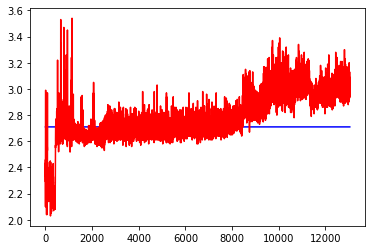

In [67]:
plt.plot(df5["Stage2.Output.Measurement5.U.Setpoint"], "b")
plt.plot(df5["Stage2.Output.Measurement5.U.Actual"].loc[df5["Stage2.Output.Measurement5.U.Actual"] > 0.01], "r")

In [68]:
# 이상치 제거 데이터 생성
df5_reduced = df5.loc[df5["Stage2.Output.Measurement5.U.Actual"] > 0.01]

##### csv 파일 추출

In [69]:
df5_indexed = df5_reduced.reset_index(drop = True)
df5_indexed.to_csv("F:\\kdt jupyter\\Project\\Data\\s2_df5_indexed.csv", index = False)

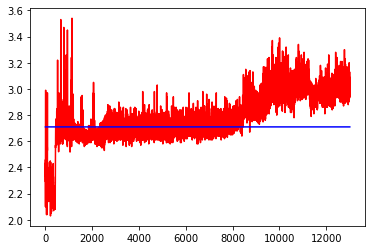

In [70]:
plt.plot(df5_indexed["Stage2.Output.Measurement5.U.Actual"], "r")
plt.plot(df5_indexed["Stage2.Output.Measurement5.U.Setpoint"], "b")

## Stage1 output6

In [71]:
df6 = df_copy.copy()

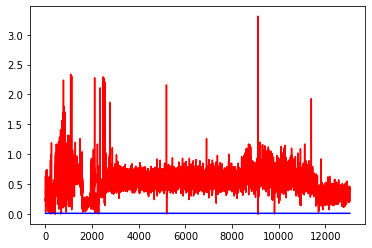

In [72]:
plt.plot(df6["Stage2.Output.Measurement6.U.Actual"], "r")
plt.plot(df6["Stage2.Output.Measurement6.U.Setpoint"], "b")

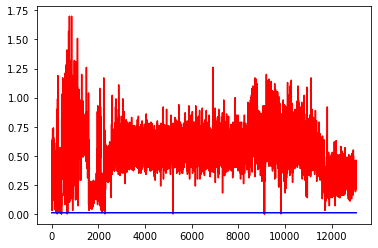

In [73]:
# output 값 1.8 보다 작은 데이터 제거
plt.plot(df6["Stage2.Output.Measurement6.U.Actual"].loc[df6["Stage2.Output.Measurement6.U.Actual"] < 1.8], "r")
plt.plot(df6["Stage2.Output.Measurement6.U.Setpoint"], "b")

In [74]:
# 4000 이상 10500 이하 index에서 0.05보다 작은 데이터 제거
drop_index = df6[4000:].loc[df6["Stage2.Output.Measurement6.U.Actual"] < 0.05]["Stage2.Output.Measurement6.U.Actual"].index
df6.drop(drop_index, inplace=True)

In [75]:
# 6000 이상 8000 이하 index에서 1.1보다 큰 데이터 제거
drop_index = df6[6000:].loc[df6["Stage2.Output.Measurement6.U.Actual"] > 1.1]["Stage2.Output.Measurement6.U.Actual"].index[:2]
df6.drop(drop_index, inplace=True)

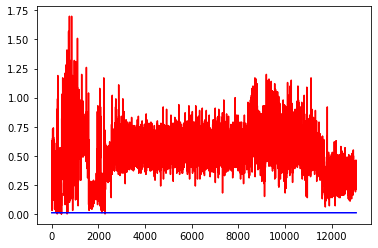

In [76]:
# output 값 1.8 보다 작은 데이터 제거
plt.plot(df6["Stage2.Output.Measurement6.U.Actual"].loc[df6["Stage2.Output.Measurement6.U.Actual"] < 1.8], "r")
plt.plot(df6["Stage2.Output.Measurement6.U.Setpoint"], "b")

In [77]:
# 이상치 제거 데이터 생성
df6_reduced = df6.loc[df6["Stage2.Output.Measurement6.U.Actual"] < 1.8]

##### csv 파일 추출

In [78]:
df6_indexed = df6_reduced.reset_index(drop = True)
df6_indexed.to_csv("F:\\kdt jupyter\\Project\\Data\\s2_df6_indexed.csv", index = False)

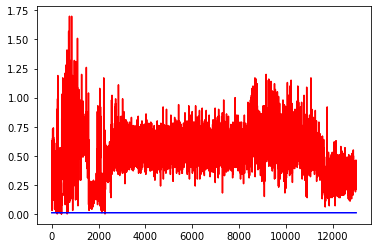

In [79]:
plt.plot(df6_indexed["Stage2.Output.Measurement6.U.Actual"], "r")
plt.plot(df6_indexed["Stage2.Output.Measurement6.U.Setpoint"], "b")

## Stage1 output7

In [80]:
df7 = df_copy.copy()

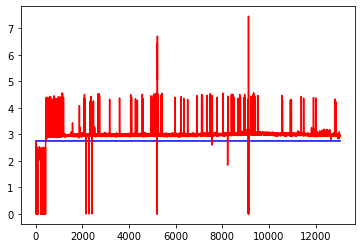

In [81]:
plt.plot(df7["Stage2.Output.Measurement7.U.Setpoint"], "b")
plt.plot(df7["Stage2.Output.Measurement7.U.Actual"], "r")

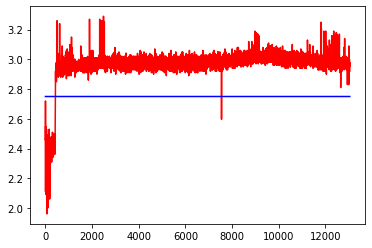

In [82]:
# output 값 2.82 보다 작은 데이터 제거
plt.plot(df7["Stage2.Output.Measurement7.U.Actual"].loc[(df7["Stage2.Output.Measurement7.U.Actual"] > 1.9) &
                                                        (df7["Stage2.Output.Measurement7.U.Actual"] < 3.3)], "r")
plt.plot(df7["Stage2.Output.Measurement7.U.Setpoint"], "b")

In [83]:
# 7000 이상 8000 이하 index에서 2.8보다 작은 데이터 제거
drop_index = df7[7000:].loc[df7["Stage2.Output.Measurement7.U.Actual"] < 2.8]["Stage2.Output.Measurement7.U.Actual"].index[0]
df7.drop(drop_index, inplace=True)

In [84]:
# 이상치 제거 데이터 생성
df7_reduced = df7.loc[(df7["Stage2.Output.Measurement7.U.Actual"] > 1.9) & (df7["Stage2.Output.Measurement7.U.Actual"] < 3.3)]

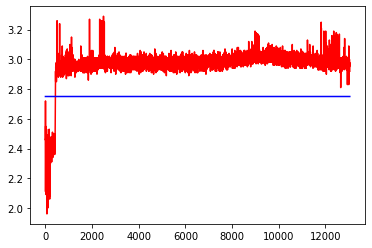

In [85]:
plt.plot(df7_reduced["Stage2.Output.Measurement7.U.Actual"], "r")
plt.plot(df7_reduced["Stage2.Output.Measurement7.U.Setpoint"], "b")

##### csv 파일 추출

In [86]:
df7_indexed = df7_reduced.reset_index(drop=True)
df7_indexed.to_csv("F:\\kdt jupyter\\Project\\Data\\s2_df7_indexed.csv", index=False)

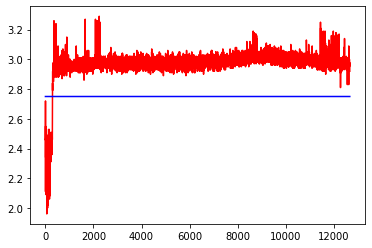

In [87]:
plt.plot(df7_indexed["Stage2.Output.Measurement7.U.Actual"], "r")
plt.plot(df7_indexed["Stage2.Output.Measurement7.U.Setpoint"], "b")

## Stage1 output8

In [88]:
df8 = df_copy.copy()

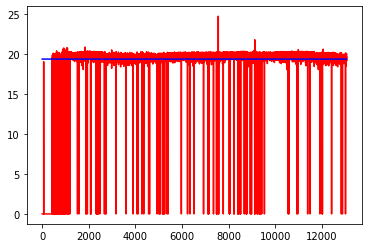

In [89]:
plt.plot(df8["Stage2.Output.Measurement8.U.Actual"], "r")
plt.plot(df8["Stage2.Output.Measurement8.U.Setpoint"], "b")

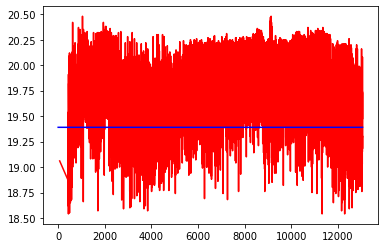

In [90]:
# output 값 18.51 보다 작고 20.5 보다 큰 데이터 제거
plt.plot(df8["Stage2.Output.Measurement8.U.Actual"].loc[(df8["Stage2.Output.Measurement8.U.Actual"] > 18.51) &
                                                        (df8["Stage2.Output.Measurement8.U.Actual"] < 20.5)], "r")
plt.plot(df8["Stage2.Output.Measurement8.U.Setpoint"], "b")

In [91]:
# 이상치 제거 데이터 생성
df8_reduced = df8.loc[(df8["Stage2.Output.Measurement8.U.Actual"] > 18.51) & (df8["Stage2.Output.Measurement8.U.Actual"] < 20.5)]

##### csv 파일 추출

In [92]:
df8_indexed = df8_reduced.reset_index(drop = True)
df8_indexed.to_csv("F:\\kdt jupyter\\Project\\Data\\s2_df8_indexed.csv", index = False)

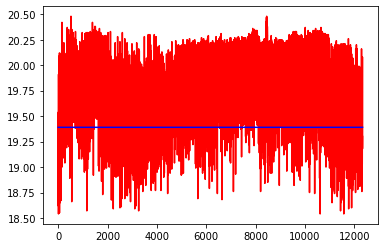

In [93]:
plt.plot(df8_indexed["Stage2.Output.Measurement8.U.Actual"], "r")
plt.plot(df8_indexed["Stage2.Output.Measurement8.U.Setpoint"], "b")

## Stage1 output9

In [94]:
df9 = df_copy.copy()

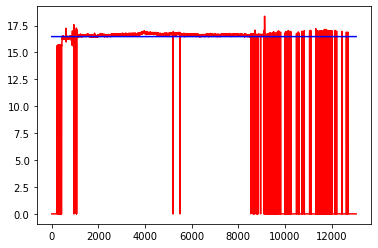

In [95]:
plt.plot(df9["Stage2.Output.Measurement9.U.Actual"], "r")
plt.plot(df9["Stage2.Output.Measurement9.U.Setpoint"], "b")

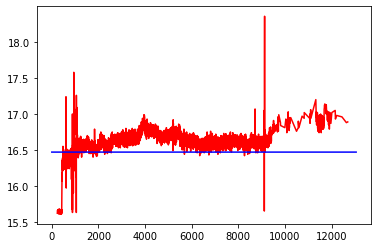

In [96]:
# output 값 13 보다 작은 데이터 제거
plt.plot(df9["Stage2.Output.Measurement9.U.Actual"].loc[df9["Stage2.Output.Measurement9.U.Actual"] > 13], "r")
plt.plot(df9["Stage2.Output.Measurement9.U.Setpoint"], "b")

In [97]:
# 이상치 제거 데이터 생성
df9 = df9.loc[df9["Stage2.Output.Measurement9.U.Actual"] > 13]

In [98]:
# 8000 이상 9200 이하 index에서 16.9보다 크고, 16보다 작은 데이터 제거
drop_index = df9[8000:9150].loc[df9["Stage2.Output.Measurement9.U.Actual"] > 16.9]["Stage2.Output.Measurement9.U.Actual"].index
df9.drop(drop_index, inplace=True)

In [99]:
drop_index = df9[8000:9200].loc[df9["Stage2.Output.Measurement9.U.Actual"] < 16]["Stage2.Output.Measurement9.U.Actual"].index
df9.drop(drop_index, inplace=True)

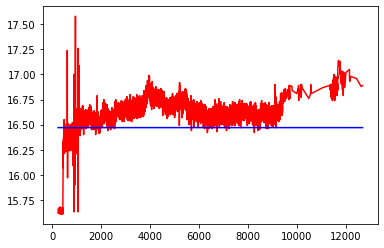

In [100]:
plt.plot(df9["Stage2.Output.Measurement9.U.Actual"], "r")
plt.plot(df9["Stage2.Output.Measurement9.U.Setpoint"], "b")

##### csv 파일 추출

In [101]:
df9_indexed = df9.reset_index(drop = True)
df9_indexed.to_csv("F:\\kdt jupyter\\Project\\Data\\s2_df9_indexed.csv", index = False)

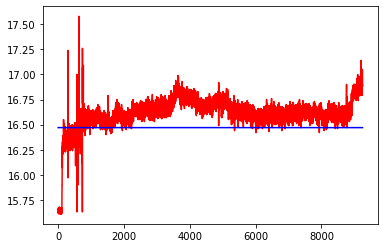

In [102]:
plt.plot(df9_indexed["Stage2.Output.Measurement9.U.Actual"], "r")
plt.plot(df9_indexed["Stage2.Output.Measurement9.U.Setpoint"], "b")

## Stage1 output10

In [103]:
df10 = df_copy.copy()

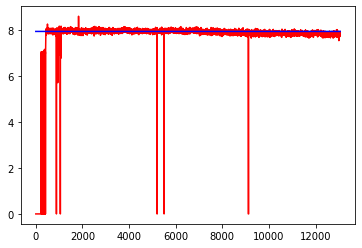

In [104]:
plt.plot(df10["Stage2.Output.Measurement10.U.Actual"], "r")
plt.plot(df10["Stage2.Output.Measurement10.U.Setpoint"], "b")

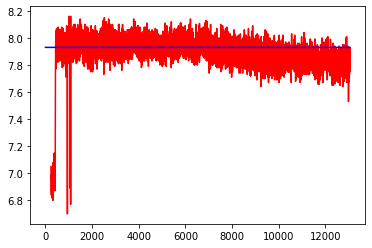

In [105]:
# output 값 6.5 보다 작고, 8.2 보다 큰 데이터 제거
plt.plot(df10["Stage2.Output.Measurement10.U.Actual"].loc[(df10["Stage2.Output.Measurement10.U.Actual"] > 6.5) &
                                                          (df10["Stage2.Output.Measurement10.U.Actual"] < 8.2)], "r")
plt.plot(df10["Stage2.Output.Measurement10.U.Setpoint"], "b")

In [106]:
# 700 이상 7.4보다 작은 데이터 제거
drop_index = df10[700:].loc[df10["Stage2.Output.Measurement10.U.Actual"] < 7.4].index
df10.drop(drop_index, inplace=True)

In [107]:
# 이상치 제거 데이터 생성
df10_reduced = df10.loc[(df10["Stage2.Output.Measurement10.U.Actual"] > 6.5) & (df10["Stage2.Output.Measurement10.U.Actual"] < 8.2)]

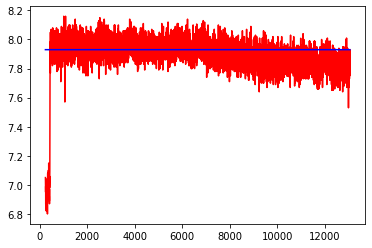

In [108]:
plt.plot(df10_reduced["Stage2.Output.Measurement10.U.Actual"], "r")
plt.plot(df10_reduced["Stage2.Output.Measurement10.U.Setpoint"], "b")

##### csv 파일 추출

In [109]:
df10_indexed = df10_reduced.reset_index(drop = True)
df10_indexed.to_csv("F:\\kdt jupyter\\Project\\Data\\s2_df10_indexed.csv", index = False)

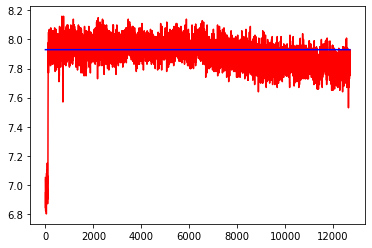

In [110]:
plt.plot(df10_indexed["Stage2.Output.Measurement10.U.Actual"], "r")
plt.plot(df10_indexed["Stage2.Output.Measurement10.U.Setpoint"], "b")

## Stage1 output11

In [111]:
df11 = df_copy.copy()

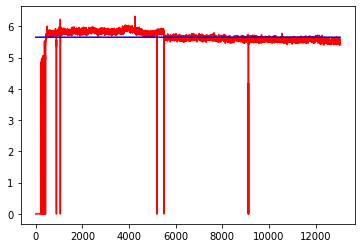

In [112]:
# 첫 번째 Setpoint 이후로는 거의 0값
plt.plot(df11["Stage2.Output.Measurement11.U.Actual"], "r")
plt.plot(df11["Stage2.Output.Measurement11.U.Setpoint"], "b")

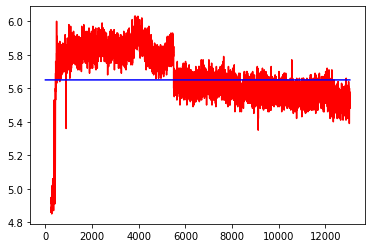

In [113]:
plt.plot(df11["Stage2.Output.Measurement11.U.Actual"].loc[(df11["Stage2.Output.Measurement11.U.Actual"] > 4.5) &
                                                          (df11["Stage2.Output.Measurement11.U.Actual"] < 6.1)], "r")
plt.plot(df11["Stage2.Output.Measurement11.U.Setpoint"], "b")

In [114]:
# 이상치 제거 데이터 생성
df11_reduced = df11.loc[(df11["Stage2.Output.Measurement11.U.Actual"] > 4.5) & (df11["Stage2.Output.Measurement11.U.Actual"] < 6.1)]

##### csv 파일 추출

In [115]:
df11_indexed = df11_reduced.reset_index(drop = True)
df11_indexed.to_csv("F:\\kdt jupyter\\Project\\Data\\s2_df11_indexed.csv", index = False)

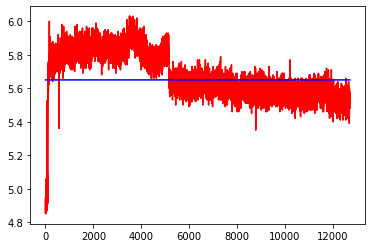

In [116]:
plt.plot(df11_indexed["Stage2.Output.Measurement11.U.Actual"], "r")
plt.plot(df11_indexed["Stage2.Output.Measurement11.U.Setpoint"], "b")

## Stage1 output12

In [117]:
df12 = df_copy.copy()

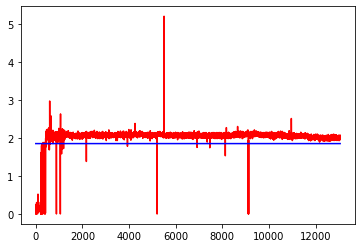

In [118]:
plt.plot(df12["Stage2.Output.Measurement12.U.Actual"], "r")
plt.plot(df12["Stage2.Output.Measurement12.U.Setpoint"], "b")

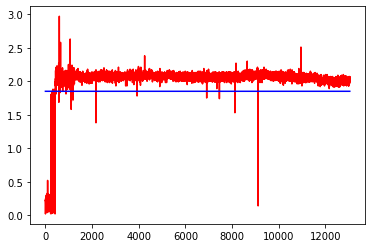

In [119]:
plt.plot(df12["Stage2.Output.Measurement12.U.Actual"].loc[(df12["Stage2.Output.Measurement12.U.Actual"] > 0.01) &
                                                          (df12["Stage2.Output.Measurement12.U.Actual"] < 4)], "r")
plt.plot(df12["Stage2.Output.Measurement12.U.Setpoint"], "b")

In [120]:
drop_index = df12[1900:].loc[df12["Stage2.Output.Measurement12.U.Actual"] < 1.8].index
df12.drop(drop_index, inplace=True)

In [121]:
# 이상치 제거 데이터 생성
df12_reduced = df12.loc[(df12["Stage2.Output.Measurement12.U.Actual"] > 0.01) & (df12["Stage2.Output.Measurement12.U.Actual"] < 2.3)]

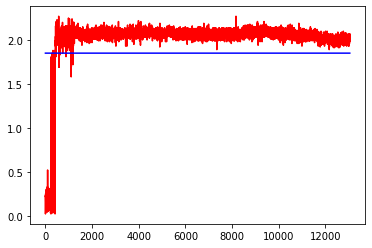

In [122]:
plt.plot(df12_reduced["Stage2.Output.Measurement12.U.Actual"], "r")
plt.plot(df12_reduced["Stage2.Output.Measurement12.U.Setpoint"], "b")

##### csv 파일 추출

In [123]:
df12_indexed = df12_reduced.reset_index(drop = True)
df12_indexed.to_csv("F:\\kdt jupyter\\Project\\Data\\s2_df12_indexed.csv", index = False)

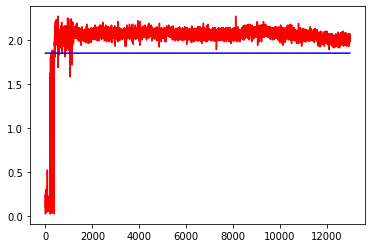

In [124]:
plt.plot(df12_indexed["Stage2.Output.Measurement12.U.Actual"], "r")
plt.plot(df12_indexed["Stage2.Output.Measurement12.U.Setpoint"], "b")

## Stage1 output13

In [125]:
df13 = df_copy.copy()

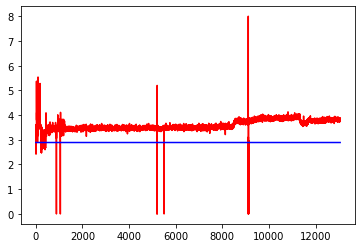

In [126]:
plt.plot(df13["Stage2.Output.Measurement13.U.Actual"], "r")
plt.plot(df13["Stage2.Output.Measurement13.U.Setpoint"], "b")

In [127]:
# 2000 이상 index에서 3.22 보다 작고, 5 보다 큰 데이터 제거
drop_index = df13[2000:].loc[df13["Stage2.Output.Measurement13.U.Actual"] > 5].index
df13.drop(drop_index, inplace=True)

In [128]:
drop_index = df13[2000:].loc[df13["Stage2.Output.Measurement13.U.Actual"] < 3.22].index
df13.drop(drop_index, inplace=True)

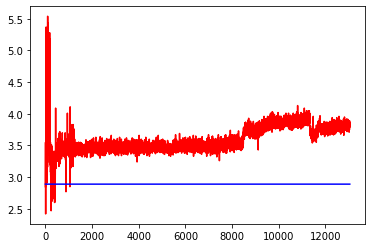

In [129]:
# output 값 2보다 작은 데이터 제거
plt.plot(df13["Stage2.Output.Measurement13.U.Actual"].loc[df13["Stage2.Output.Measurement13.U.Actual"] > 2], "r")
plt.plot(df13["Stage2.Output.Measurement13.U.Setpoint"], "b")

In [130]:
# 이상치 제거 데이터 생성
df13_reduced = df13.loc[df13["Stage2.Output.Measurement13.U.Actual"] > 2]

##### csv 파일 추출

In [131]:
df13_indexed = df13_reduced.reset_index(drop = True)
df13_indexed.to_csv("F:\\kdt jupyter\\Project\\Data\\s2_df13_indexed.csv", index = False)

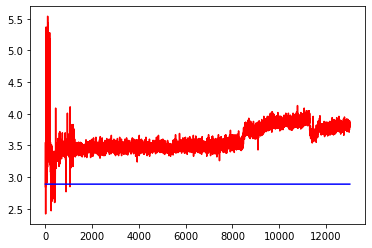

In [132]:
plt.plot(df13_indexed["Stage2.Output.Measurement13.U.Actual"], "r")
plt.plot(df13_indexed["Stage2.Output.Measurement13.U.Setpoint"], "b")

## Stage1 output14

In [133]:
df14 = df_copy.copy()

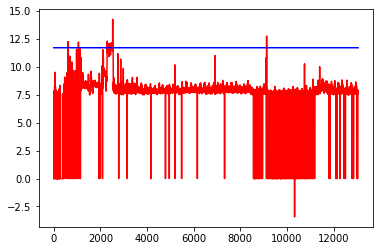

In [134]:
plt.plot(df14["Stage2.Output.Measurement14.U.Actual"], "r")
plt.plot(df14["Stage2.Output.Measurement14.U.Setpoint"], "b")

In [135]:
# 4000 이상 index에서 8.95 보다 큰 데이터 제거
drop_index = df14[4000:].loc[df14["Stage2.Output.Measurement14.U.Actual"] > 8.8].index
df14.drop(drop_index, inplace=True)

In [136]:
# 2000 이하 index에서 12 보다 큰 데이터 제거
drop_index = df14[:2000].loc[df14["Stage2.Output.Measurement14.U.Actual"] > 12].index
df14.drop(drop_index, inplace=True)

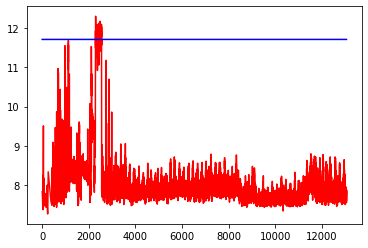

In [137]:
# output 값 6 보다 작고, 13보다 큰 데이터 제거
plt.plot(df14["Stage2.Output.Measurement14.U.Actual"].loc[(df14["Stage2.Output.Measurement14.U.Actual"] > 6) &
                                                          (df14["Stage2.Output.Measurement14.U.Actual"] < 13)], "r")
plt.plot(df14["Stage2.Output.Measurement14.U.Setpoint"], "b")

In [138]:
# 이상치 제거 데이터 생성
df14_reduced = df14.loc[(df14["Stage2.Output.Measurement14.U.Actual"] > 6) & (df14["Stage2.Output.Measurement14.U.Actual"] < 13)]

##### csv 파일 추출

In [139]:
df14_indexed = df14_reduced.reset_index(drop = True)
df14_indexed.to_csv("F:\\kdt jupyter\\Project\\Data\\s2_df14_indexed.csv", index = False)

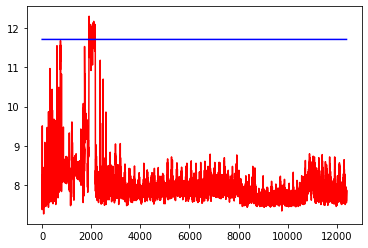

In [140]:
plt.plot(df14_indexed["Stage2.Output.Measurement14.U.Actual"], "r")
plt.plot(df14_indexed["Stage2.Output.Measurement14.U.Setpoint"], "b")

## 전처리 후 각 stage2 output plot

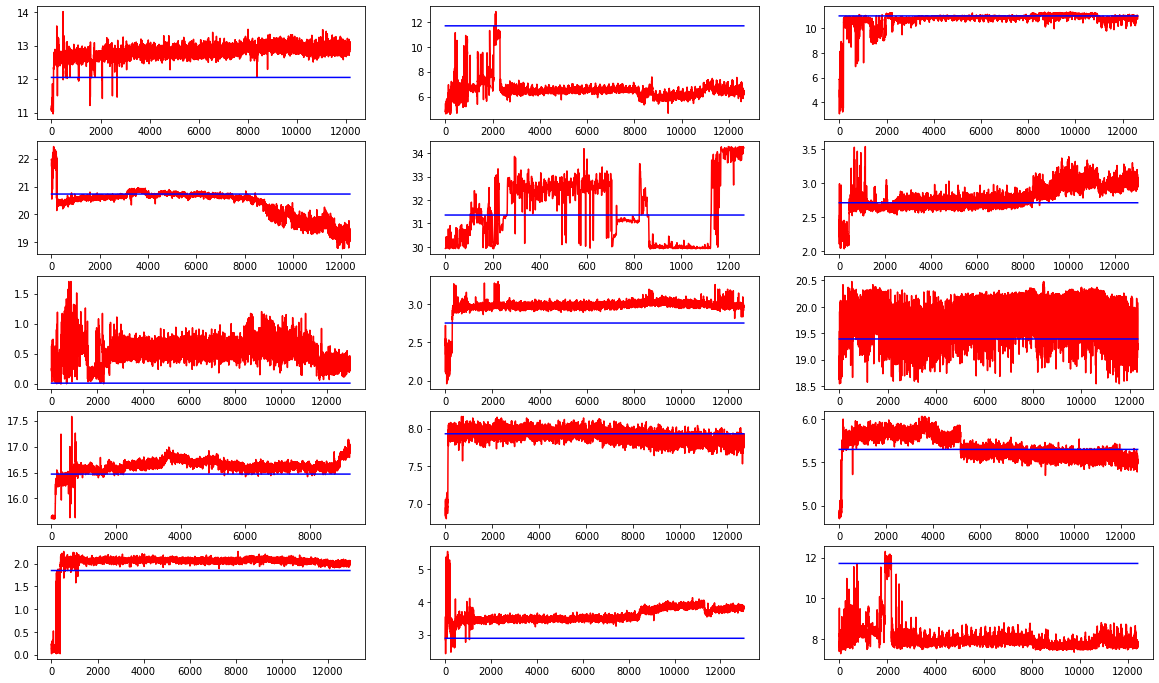

In [141]:
fig, ax = plt.subplots(5, 3, figsize = (20, 12))

ax[0, 0].plot(df0_indexed["Stage2.Output.Measurement0.U.Actual"], "r")
ax[0, 0].plot(df0_indexed["Stage2.Output.Measurement0.U.Setpoint"], "b")
ax[0, 1].plot(df1_indexed["Stage2.Output.Measurement1.U.Actual"], "r")
ax[0, 1].plot(df1_indexed["Stage2.Output.Measurement1.U.Setpoint"], "b")
ax[0, 2].plot(df2_indexed["Stage2.Output.Measurement2.U.Actual"], "r")
ax[0, 2].plot(df2_indexed["Stage2.Output.Measurement2.U.Setpoint"], "b")

ax[1, 0].plot(df3_indexed["Stage2.Output.Measurement3.U.Actual"], "r")
ax[1, 0].plot(df3_indexed["Stage2.Output.Measurement3.U.Setpoint"], "b")
ax[1, 1].plot(df4_indexed["Stage2.Output.Measurement4.U.Actual"], "r")
ax[1, 1].plot(df4_indexed["Stage2.Output.Measurement4.U.Setpoint"], "b")
ax[1, 2].plot(df5_indexed["Stage2.Output.Measurement5.U.Actual"], "r")
ax[1, 2].plot(df5_indexed["Stage2.Output.Measurement5.U.Setpoint"], "b")

ax[2, 0].plot(df6_indexed["Stage2.Output.Measurement6.U.Actual"], "r")
ax[2, 0].plot(df6_indexed["Stage2.Output.Measurement6.U.Setpoint"], "b")
ax[2, 1].plot(df7_indexed["Stage2.Output.Measurement7.U.Actual"], "r")
ax[2, 1].plot(df7_indexed["Stage2.Output.Measurement7.U.Setpoint"], "b")
ax[2, 2].plot(df8_indexed["Stage2.Output.Measurement8.U.Actual"], "r")
ax[2, 2].plot(df8_indexed["Stage2.Output.Measurement8.U.Setpoint"], "b")

ax[3, 0].plot(df9_indexed["Stage2.Output.Measurement9.U.Actual"], "r")
ax[3, 0].plot(df9_indexed["Stage2.Output.Measurement9.U.Setpoint"], "b")
ax[3, 1].plot(df10_indexed["Stage2.Output.Measurement10.U.Actual"], "r")
ax[3, 1].plot(df10_indexed["Stage2.Output.Measurement10.U.Setpoint"], "b")
ax[3, 2].plot(df11_indexed["Stage2.Output.Measurement11.U.Actual"], "r")
ax[3, 2].plot(df11_indexed["Stage2.Output.Measurement11.U.Setpoint"], "b")

ax[4, 0].plot(df12_indexed["Stage2.Output.Measurement12.U.Actual"], "r")
ax[4, 0].plot(df12_indexed["Stage2.Output.Measurement12.U.Setpoint"], "b")
ax[4, 1].plot(df13_indexed["Stage2.Output.Measurement13.U.Actual"], "r")
ax[4, 1].plot(df13_indexed["Stage2.Output.Measurement13.U.Setpoint"], "b")
ax[4, 2].plot(df14_indexed["Stage2.Output.Measurement14.U.Actual"], "r")
ax[4, 2].plot(df14_indexed["Stage2.Output.Measurement14.U.Setpoint"], "b")

plt.show()